In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
# importing all datasets
air_df = pd.read_csv('airline-safety.csv')
air_df_00_14 = air_df.drop(['incidents_85_99', 'fatalities_85_99', 'fatal_accidents_85_99'], axis = 1)
car_df = pd.read_excel('US_Vehicle_Fatalities.xlsx')
# importing only data of revenue from 2000 and beyond
revenue_df = pd.read_csv('Financials_Full_Data_data.csv')

In [79]:
revenue_df[23:]

,Year,Fuel Expense,Labor Expense,Net Profit,Operating Profit,Other Expense*,Pre-Tax Profit,Total Operating Expense,Total Operating Revenue
23,2000,14099.131202,34490.106248,2237.762755,5701.869486,51019.661163,4776.124013,99608.898613,105310.768099
24,2001,13119.558692,36260.795502,-8008.156676,-10365.128327,52996.336564,-10655.963301,102376.690758,92011.562431
25,2002,10959.218709,35653.329723,-11761.550574,-9543.815276,47186.104940,-14578.379039,93798.653372,84254.838096
26,2003,12852.730222,34147.886885,-2088.281163,-3048.978041,48998.144288,-2025.066309,95998.761395,92949.783354
27,2004,18712.514660,33847.702501,-10046.008244,-3375.334342,57549.172349,-8575.068275,110109.389510,106734.055168
28,2005,27221.360985,31158.899377,-28646.629862,-2004.762198,62634.507884,-27605.420972,121014.768246,119010.006048
29,2006,31539.197356,30337.947597,16527.301766,5034.936479,64049.223507,16570.275352,125926.368460,130961.304939
30,2007,33876.837304,31045.199652,6306.099750,6674.818275,66624.574016,7908.534449,131546.610972,138221.429247
31,2008,47945.325493,30798.010964,-24500.243754,-5596.943630,73245.906347,-26154.839183,151989.242804,146392.299174
32,2009,27419.106455,31026.394558,-2820.948454,1022.091770,63987.599701,-3439.873786,122433.100714,123455.192484


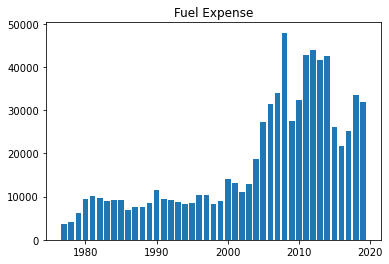

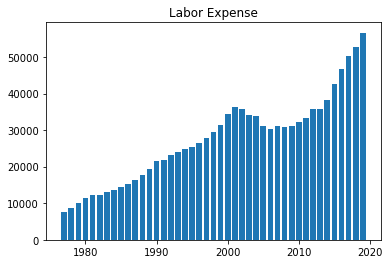

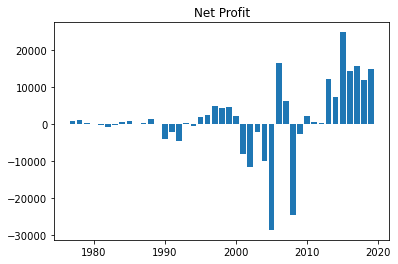

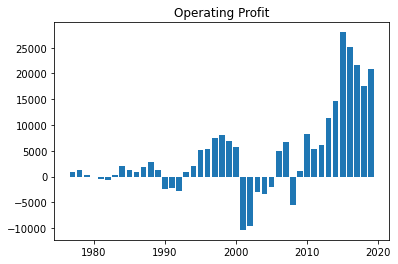

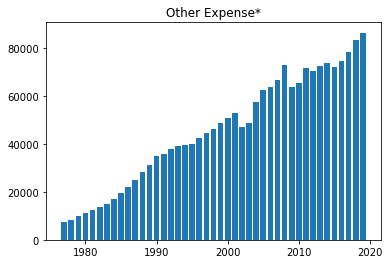

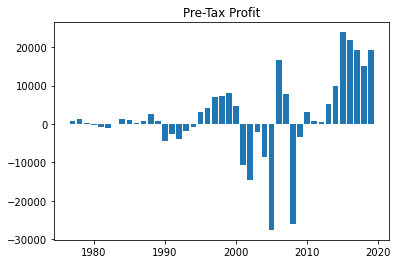

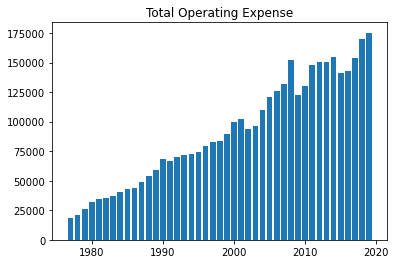

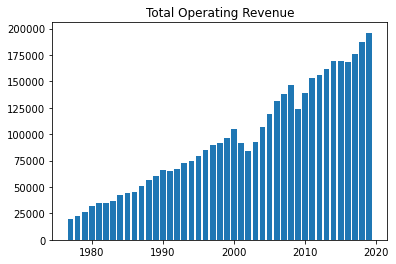

In [14]:
for col in revenue_df.columns:
    if col == 'Year':
        continue
    else:
        plt.bar(revenue_df['Year'], revenue_df[col])
        plt.title(col)
        plt.show()

In [27]:
# conversion of available seat metric to match FARS data
air_df['avail_seat_miles(billions)'] = round(air_df['avail_seat_km_per_week']*15*52*.6213712/1e9).astype(int)
air_df['fatalities_per_billion_seat_mi_85_99'] = air_df['fatalities_85_99']/air_df['avail_seat_miles(billions)']
air_df['fatalities_per_billion_seat_mi_00_14'] = air_df['fatalities_00_14']/air_df['avail_seat_miles(billions)']
air_df['fatality_ratio_change'] = air_df['fatalities_per_billion_seat_mi_00_14']-air_df['fatalities_per_billion_seat_mi_85_99']

In [75]:
air_df_85_offenders = air_df.sort_values(by = ['fatalities_per_billion_seat_mi_85_99'])
air_df_85_offenders

,airline,avail_seat_km_per_week,incidents_85_99,fatal_accidents_85_99,fatalities_85_99,incidents_00_14,fatal_accidents_00_14,fatalities_00_14,avail_seat_miles(billions),fatalities_per_billion_seat_mi_85_99,fatalities_per_billion_seat_mi_00_14,fatality_ratio_change
0,Aer Lingus,320906734,2,0,0,0,0,0,156,0.000000,0.000000,0.000000
43,Southwest Airlines,3276525770,1,0,0,8,0,0,1588,0.000000,0.000000,0.000000
29,Kenya Airways,277414794,2,0,0,2,2,283,134,0.000000,2.111940,2.111940
54,Virgin Atlantic,1005248585,1,0,0,0,0,0,487,0.000000,0.000000,0.000000
26,Hawaiian Airlines,493877795,0,0,0,1,0,0,239,0.000000,0.000000,0.000000
25,Gulf Air,301379762,1,0,0,3,1,143,146,0.000000,0.979452,0.979452
23,Finnair,506464950,1,0,0,0,0,0,245,0.000000,0.000000,0.000000
48,TAP - Air Portugal,619130754,0,0,0,0,0,0,300,0.000000,0.000000,0.000000
39,SAS*,682971852,5,0,0,6,1,110,331,0.000000,0.332326,0.332326
15,Cathay Pacific*,2582459303,0,0,0,2,0,0,1252,0.000000,0.000000,0.000000


In [47]:
air_df_00_offenders = air_df.sort_values(by = ['fatalities_per_billion_seat_mi_00_14'])
air_df_00_offenders.iloc[-5:,]

,airline,avail_seat_km_per_week,incidents_85_99,fatal_accidents_85_99,fatalities_85_99,incidents_00_14,fatal_accidents_00_14,fatalities_00_14,avail_seat_miles(billions),fatalities_per_billion_seat_mi_85_99,fatalities_per_billion_seat_mi_00_14,fatality_ratio_change
22,Ethiopian Airlines,488560643,25,5,167,5,2,92,237,0.704641,0.388186,-0.316456
16,China Airlines,813216487,12,6,535,2,1,225,394,1.357868,0.571066,-0.786802
25,Gulf Air,301379762,1,0,0,3,1,143,146,0.000000,0.979452,0.979452
34,Malaysia Airlines,1039171244,3,1,34,3,2,537,504,0.067460,1.065476,0.998016
29,Kenya Airways,277414794,2,0,0,2,2,283,134,0.000000,2.111940,2.111940


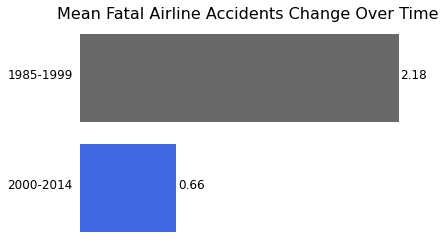

In [18]:
labels = ['2000-2014', '1985-1999']
values = round(air_df[['fatal_accidents_00_14', 'fatal_accidents_85_99']].mean(),2)
xs = [0,1]
plt.barh(labels, values, color = ['royalblue','dimgray'])
plt.title('Mean Fatal Airline Accidents Change Over Time', fontsize = 16)
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.axis('off')
for x,y in zip(labels, xs):
    label = "{}".format(x)
    plt.annotate(label, # this is the text
                 (0,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(-40,0), # distance from text to points (x,y)
                 ha='center',
                 fontsize = 12) # horizontal alignment can be left, right or center
for x,y in zip(values, xs):
    label = "{}".format(x)
    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(15,0), # distance from text to points (x,y)
                 ha='center',
                 fontsize = 12) # horizontal alignment can be left, right or center
plt.show()

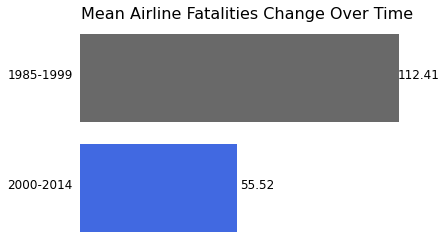

In [20]:
labels = ['2000-2014', '1985-1999']
values = round(air_df[['fatalities_00_14', 'fatalities_85_99']].mean(),2)
plt.barh(labels, values, color = ['royalblue','dimgray'])
plt.title('Mean Airline Fatalities Change Over Time', fontsize = 16)
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.axis('off')
for x,y in zip(labels, xs):
    label = "{}".format(x)
    plt.annotate(label, # this is the text
                 (0,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(-40,0), # distance from text to points (x,y)
                 ha='center',
                 fontsize = 12) # horizontal alignment can be left, right or center
for x,y in zip(values, xs):
    label = "{}".format(x)
    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(20,0), # distance from text to points (x,y)
                 ha='center',
                 fontsize = 12) # horizontal alignment can be left, right or center
plt.show()

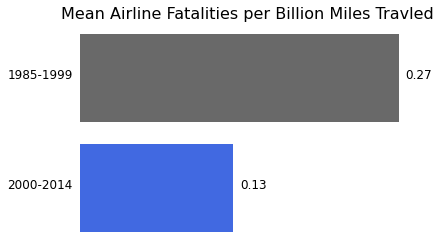

In [31]:
labels = ['2000-2014', '1985-1999']
values = round(air_df[['fatalities_per_billion_seat_mi_00_14', 'fatalities_per_billion_seat_mi_85_99']].mean(),2)
plt.barh(labels, values, color = ['royalblue','dimgray'])
plt.title('Mean Airline Fatalities per Billion Miles Travled', fontsize = 16)
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.axis('off')
for x,y in zip(labels, xs):
    label = "{}".format(x)
    plt.annotate(label, # this is the text
                 (0,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(-40,0), # distance from text to points (x,y)
                 ha='center',
                 fontsize = 12) # horizontal alignment can be left, right or center
for x,y in zip(values, xs):
    label = "{}".format(x)
    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(20,0), # distance from text to points (x,y)
                 ha='center',
                 fontsize = 12) # horizontal alignment can be left, right or center
plt.show()

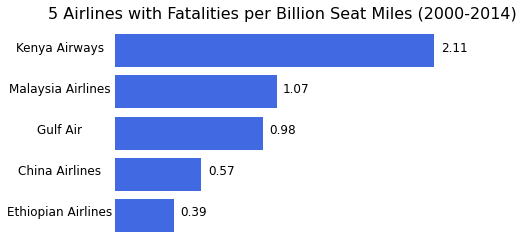

In [91]:
labels = air_df_00_offenders.iloc[-5:,]['airline']
values = air_df_00_offenders.iloc[-5:,]['fatalities_per_billion_seat_mi_00_14']
plt.barh(labels, round(values,2), color = 'royalblue')
plt.title('5 Airlines with Fatalities per Billion Seat Miles (2000-2014)', fontsize = 16)
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.axis('off')
reference = [0, 1, 2, 3, 4]
for x,y,z in zip(labels, values, reference):
    label = "{}".format(x)
    plt.annotate(label, # this is the text
                 (0,z), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(-55,0), # distance from text to points (x,y)
                 ha='center',
                 fontsize = 12) # horizontal alignment can be left, right or center
for x,y,z in zip(values, values, reference):
    label = "{}".format(round(x, 2))
    plt.annotate(label, # this is the text
                 (x,z), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(20,0), # distance from text to points (x,y)
                 ha='center',
                 fontsize = 12) # horizontal alignment can be left, right or center
plt.show()

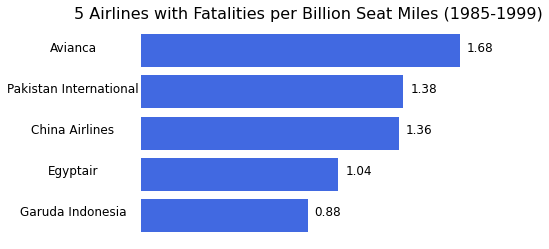

In [92]:
labels = air_df_85_offenders.iloc[-5:,]['airline']
values = air_df_85_offenders.iloc[-5:,]['fatalities_per_billion_seat_mi_85_99']
plt.barh(labels, round(values,2), color = 'royalblue')
plt.title('5 Airlines with Fatalities per Billion Seat Miles (1985-1999)', fontsize = 16)
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.axis('off')
reference = [0, 1, 2, 3, 4]
for x,y,z in zip(labels, values, reference):
    label = "{}".format(x)
    plt.annotate(label, # this is the text
                 (0,z), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(-68,0), # distance from text to points (x,y)
                 ha='center',
                 fontsize = 12) # horizontal alignment can be left, right or center
for x,y,z in zip(values, values, reference):
    label = "{}".format(round(x, 2))
    plt.annotate(label, # this is the text
                 (x,z), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(20,0), # distance from text to points (x,y)
                 ha='center',
                 fontsize = 12) # horizontal alignment can be left, right or center
plt.show()

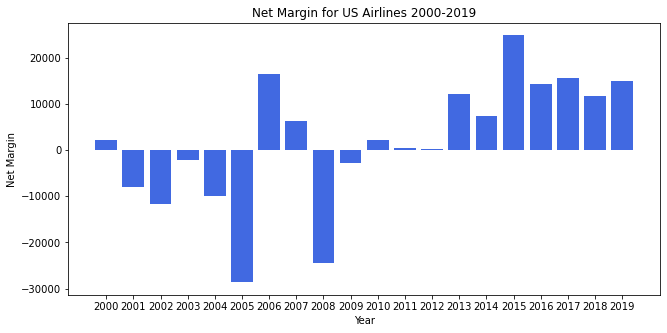

In [93]:
years = np.arange(2000, 2020, 1)
plt.figure(figsize = (10.6, 5))
plt.title('Net Margin for US Airlines 2000-2019')
plt.ylabel('Net Margin')
plt.xlabel('Year')
plt.xticks(ticks = years, labels = years)
plt.bar(revenue_df[23:]['Year'], revenue_df[23:]['Net Profit'], color = 'royalblue')
plt.show()

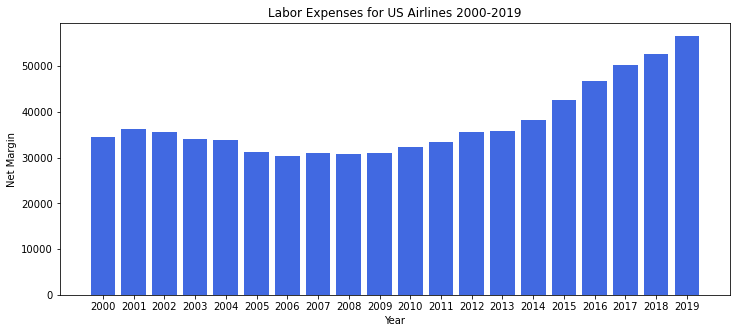

In [94]:
years = np.arange(2000, 2020, 1)
plt.figure(figsize = (12, 5))
plt.title('Labor Expenses for US Airlines 2000-2019')
plt.ylabel('Net Margin')
plt.xlabel('Year')
plt.xticks(ticks = years, labels = years)
plt.bar(revenue_df[23:]['Year'], revenue_df[23:]['Labor Expense'], color = 'royalblue')
plt.show()